In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Waste_Generation_Data_csv.csv')

# Display the first few rows
df.head()


,Date,Total Waste Generated (kg),Population Size,Economic Activity Index,Temperature (°C),Rainfall (mm),Organic Waste (%),Plastic Waste (%),E-Waste (%)
0,2024-01-01,3600,57270,73.28,26.11,9.03,44.67,25.18,5.61
1,2024-01-02,3245,50860,77.13,27.61,28.40,50.80,22.99,7.09
2,2024-01-03,3248,55390,64.33,32.36,45.77,57.60,29.41,8.76
3,2024-01-04,3516,55191,79.54,22.95,1.70,53.02,22.59,5.36
4,2024-01-05,3294,55734,51.53,13.83,34.87,50.66,24.30,5.40


In [ ]:
# Check for missing values
df.isnull().sum()


,0
Date,0
Total Waste Generated (kg),0
Population Size,0
Economic Activity Index,0
Temperature (°C),0
Rainfall (mm),0
Organic Waste (%),0
Plastic Waste (%),0
E-Waste (%),0


In [ ]:
# Check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        365 non-null    object 
 1   Total Waste Generated (kg)  365 non-null    int64  
 2   Population Size             365 non-null    int64  
 3   Economic Activity Index     365 non-null    float64
 4   Temperature (°C)            365 non-null    float64
 5   Rainfall (mm)               365 non-null    float64
 6   Organic Waste (%)           365 non-null    float64
 7   Plastic Waste (%)           365 non-null    float64
 8   E-Waste (%)                 365 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 25.8+ KB


In [ ]:
# Summary statistics
df.describe()


,Total Waste Generated (kg),Population Size,Economic Activity Index,Temperature (°C),Rainfall (mm),Organic Waste (%),Plastic Waste (%),E-Waste (%)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,3446.109589,55046.846575,74.647479,24.560356,25.769890,50.077671,24.998822,7.473151
std,217.231365,2825.971397,14.928485,8.551574,14.937012,5.774526,2.883074,1.431225
min,2941.000000,50064.000000,50.540000,10.140000,0.320000,40.060000,20.020000,5.000000
25%,3294.000000,52693.000000,61.180000,16.970000,11.880000,45.040000,22.570000,6.390000
50%,3413.000000,55258.000000,74.720000,24.430000,26.970000,50.350000,25.060000,7.440000
75%,3601.000000,57400.000000,87.620000,31.930000,38.980000,55.110000,27.510000,8.690000
max,3979.000000,59998.000000,99.990000,39.910000,49.900000,59.970000,29.950000,9.990000


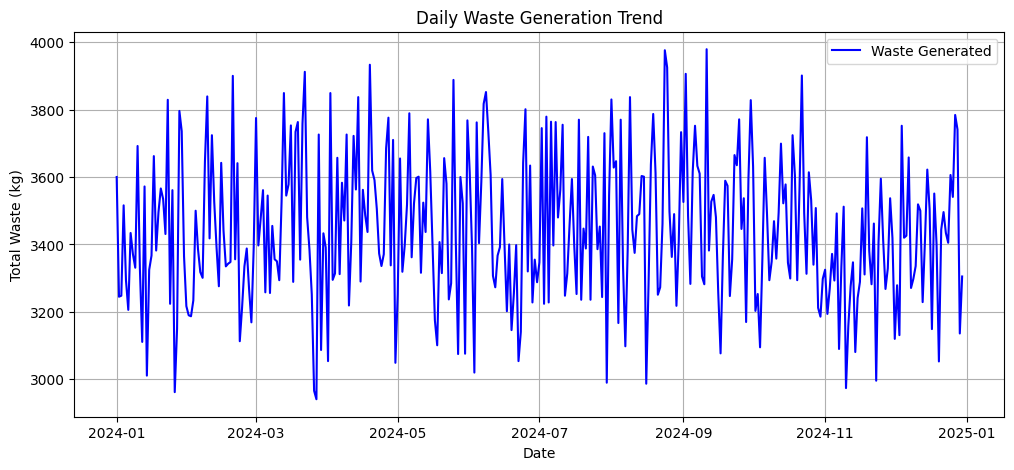

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot time-series waste generation
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Total Waste Generated (kg)'], color='blue', label='Waste Generated')
plt.xlabel('Date')
plt.ylabel('Total Waste (kg)')
plt.title('Daily Waste Generation Trend')
plt.legend()
plt.grid()
plt.show()


Plot Waste Generation Over Time
Let’s check the trend of waste generated daily

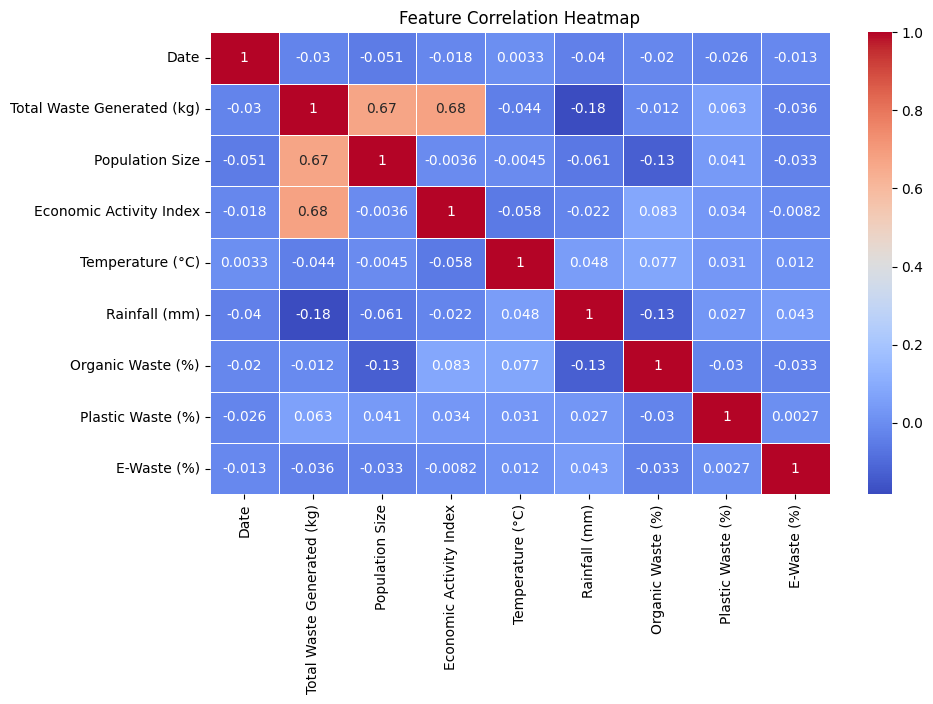

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


#👉 This helps in understanding which factors influence waste generation the most.



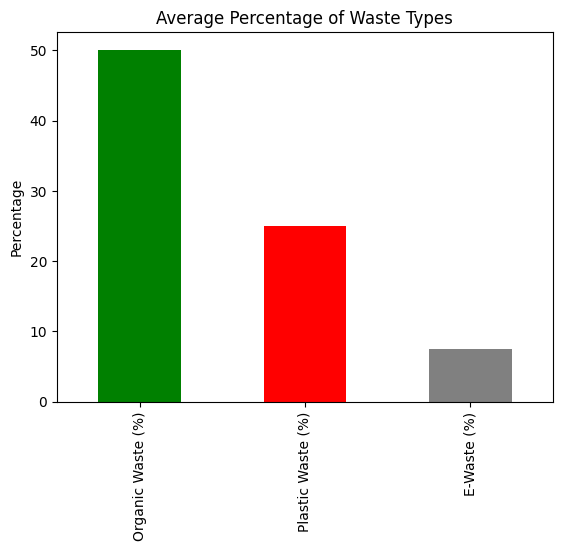

In [ ]:
# Waste type distribution
waste_types = ['Organic Waste (%)', 'Plastic Waste (%)', 'E-Waste (%)']
df[waste_types].mean().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Average Percentage of Waste Types")
plt.ylabel("Percentage")
plt.show()


#Let’s visualize the percentage of different waste types:



In [ ]:
# Select features (independent variables)
X = df[['Population Size', 'Economic Activity Index', 'Temperature (°C)', 'Rainfall (mm)',
        'Organic Waste (%)', 'Plastic Waste (%)', 'E-Waste (%)']]

# Target variable (Total Waste Generated)
y = df['Total Waste Generated (kg)']


We need to separate the independent variables (X) and the dependent variable (y).

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (292, 7)
Testing set size: (73, 7)


We split the data into 80% training and 20% testing:

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Train a Linear Regression Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 53.32
Mean Squared Error (MSE): 3720.91
Root Mean Squared Error (RMSE): 61.00
R² Score: 0.92


Evaluate the Model’s Performance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model again
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Ensure X_train and y_train exist

print("Model trained successfully!")


Model trained successfully!


Trained a model to evaluate predictions.

In [ ]:
import numpy as np
import pandas as pd

# Define a new input (Example scenario)
sample_data = np.array([[55000, 85, 30, 10, 50, 25, 7]])

# Convert to DataFrame (to match training format)
sample_df = pd.DataFrame(sample_data, columns=['Population Size', 'Economic Activity Index',
                                               'Temperature (°C)', 'Rainfall (mm)',
                                               'Organic Waste (%)', 'Plastic Waste (%)', 'E-Waste (%)'])

# Predict using the trained Random Forest model
predicted_waste = rf_model.predict(sample_df)

print(f"Predicted Waste Generation: {predicted_waste[0]:.2f} kg")


Predicted Waste Generation: 3492.84 kg


Future Waste data prediction